In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../processed/data.csv', delimiter=';')

Movies per year

Text(0.5, 0, 'Year')

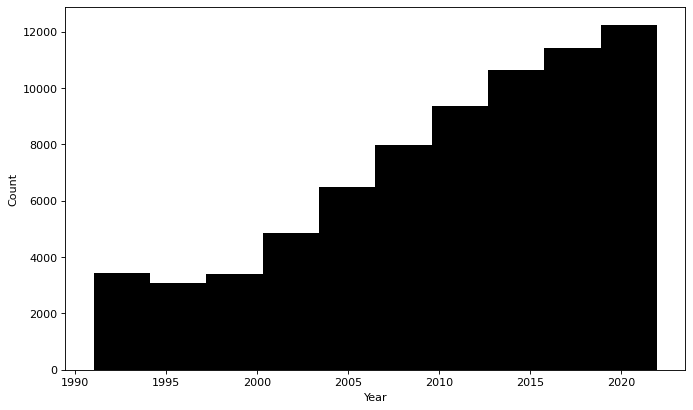

In [12]:
# create serie to plot
movies_year = df["startYear"]

# configure plot
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(movies_year, color='black')  
plt.ylabel('Count')
plt.xlabel('Year')

#movies_year.plot.bar()
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('./pictures/number_movies_per_year.png')
#plt.clf()

Movies per director

Text(0.5, 0, 'Genre')

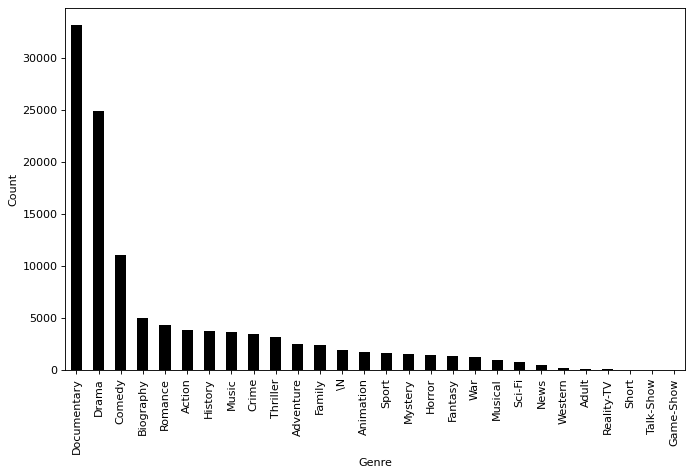

In [13]:
# create serie to plot
df_genre = df.assign(genres=df['genres'].str.split(',')).explode('genres')

movies_genre = df_genre["genres"]

# configure plot
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation=90)
df_genre['genres'].value_counts().plot.bar(color='black')

plt.ylabel('Count')
plt.xlabel('Genre')

#movies_year.plot.bar()
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('./pictures/number_movies_per_year.png')
#plt.clf()

Text(0.5, 0, 'Adult movies')

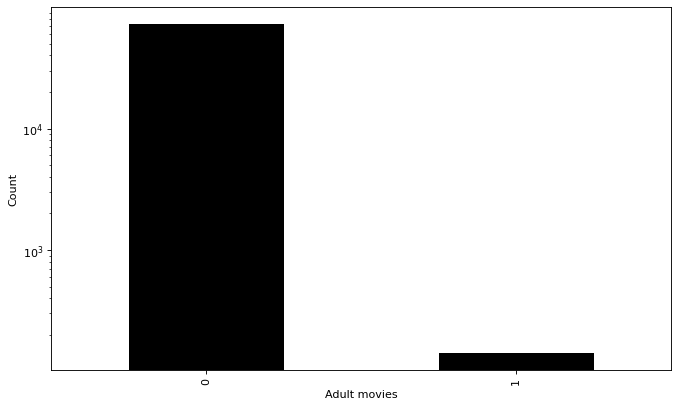

In [18]:
# configure plot

plt.figure(figsize=(10, 6), dpi=80)
df['isAdult'].value_counts().plot.bar(color='black')

plt.ylabel('Count')
plt.yscale("log")
plt.xlabel('Adult movies')

#movies_year.plot.bar()
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('./pictures/number_movies_per_year.png')
#plt.clf()

In [16]:
df['isAdult'].value_counts()

0    72732
1      141
Name: isAdult, dtype: int64

Text(0.5, 0, 'Average Rating')

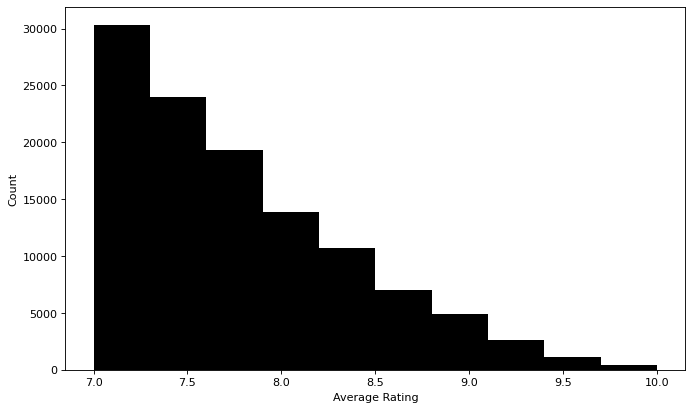

In [15]:
# create serie to plot

duration = df_genre["averageRating"]

# configure plot
plt.figure(figsize=(10, 6), dpi=80)
plt.hist(duration, color='black')  
plt.ylabel('Count')
plt.xlabel('Average Rating')
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('./pictures/number_movies_per_year.png')
#plt.clf()

<AxesSubplot:title={'center':'averageRating'}, xlabel='genres'>

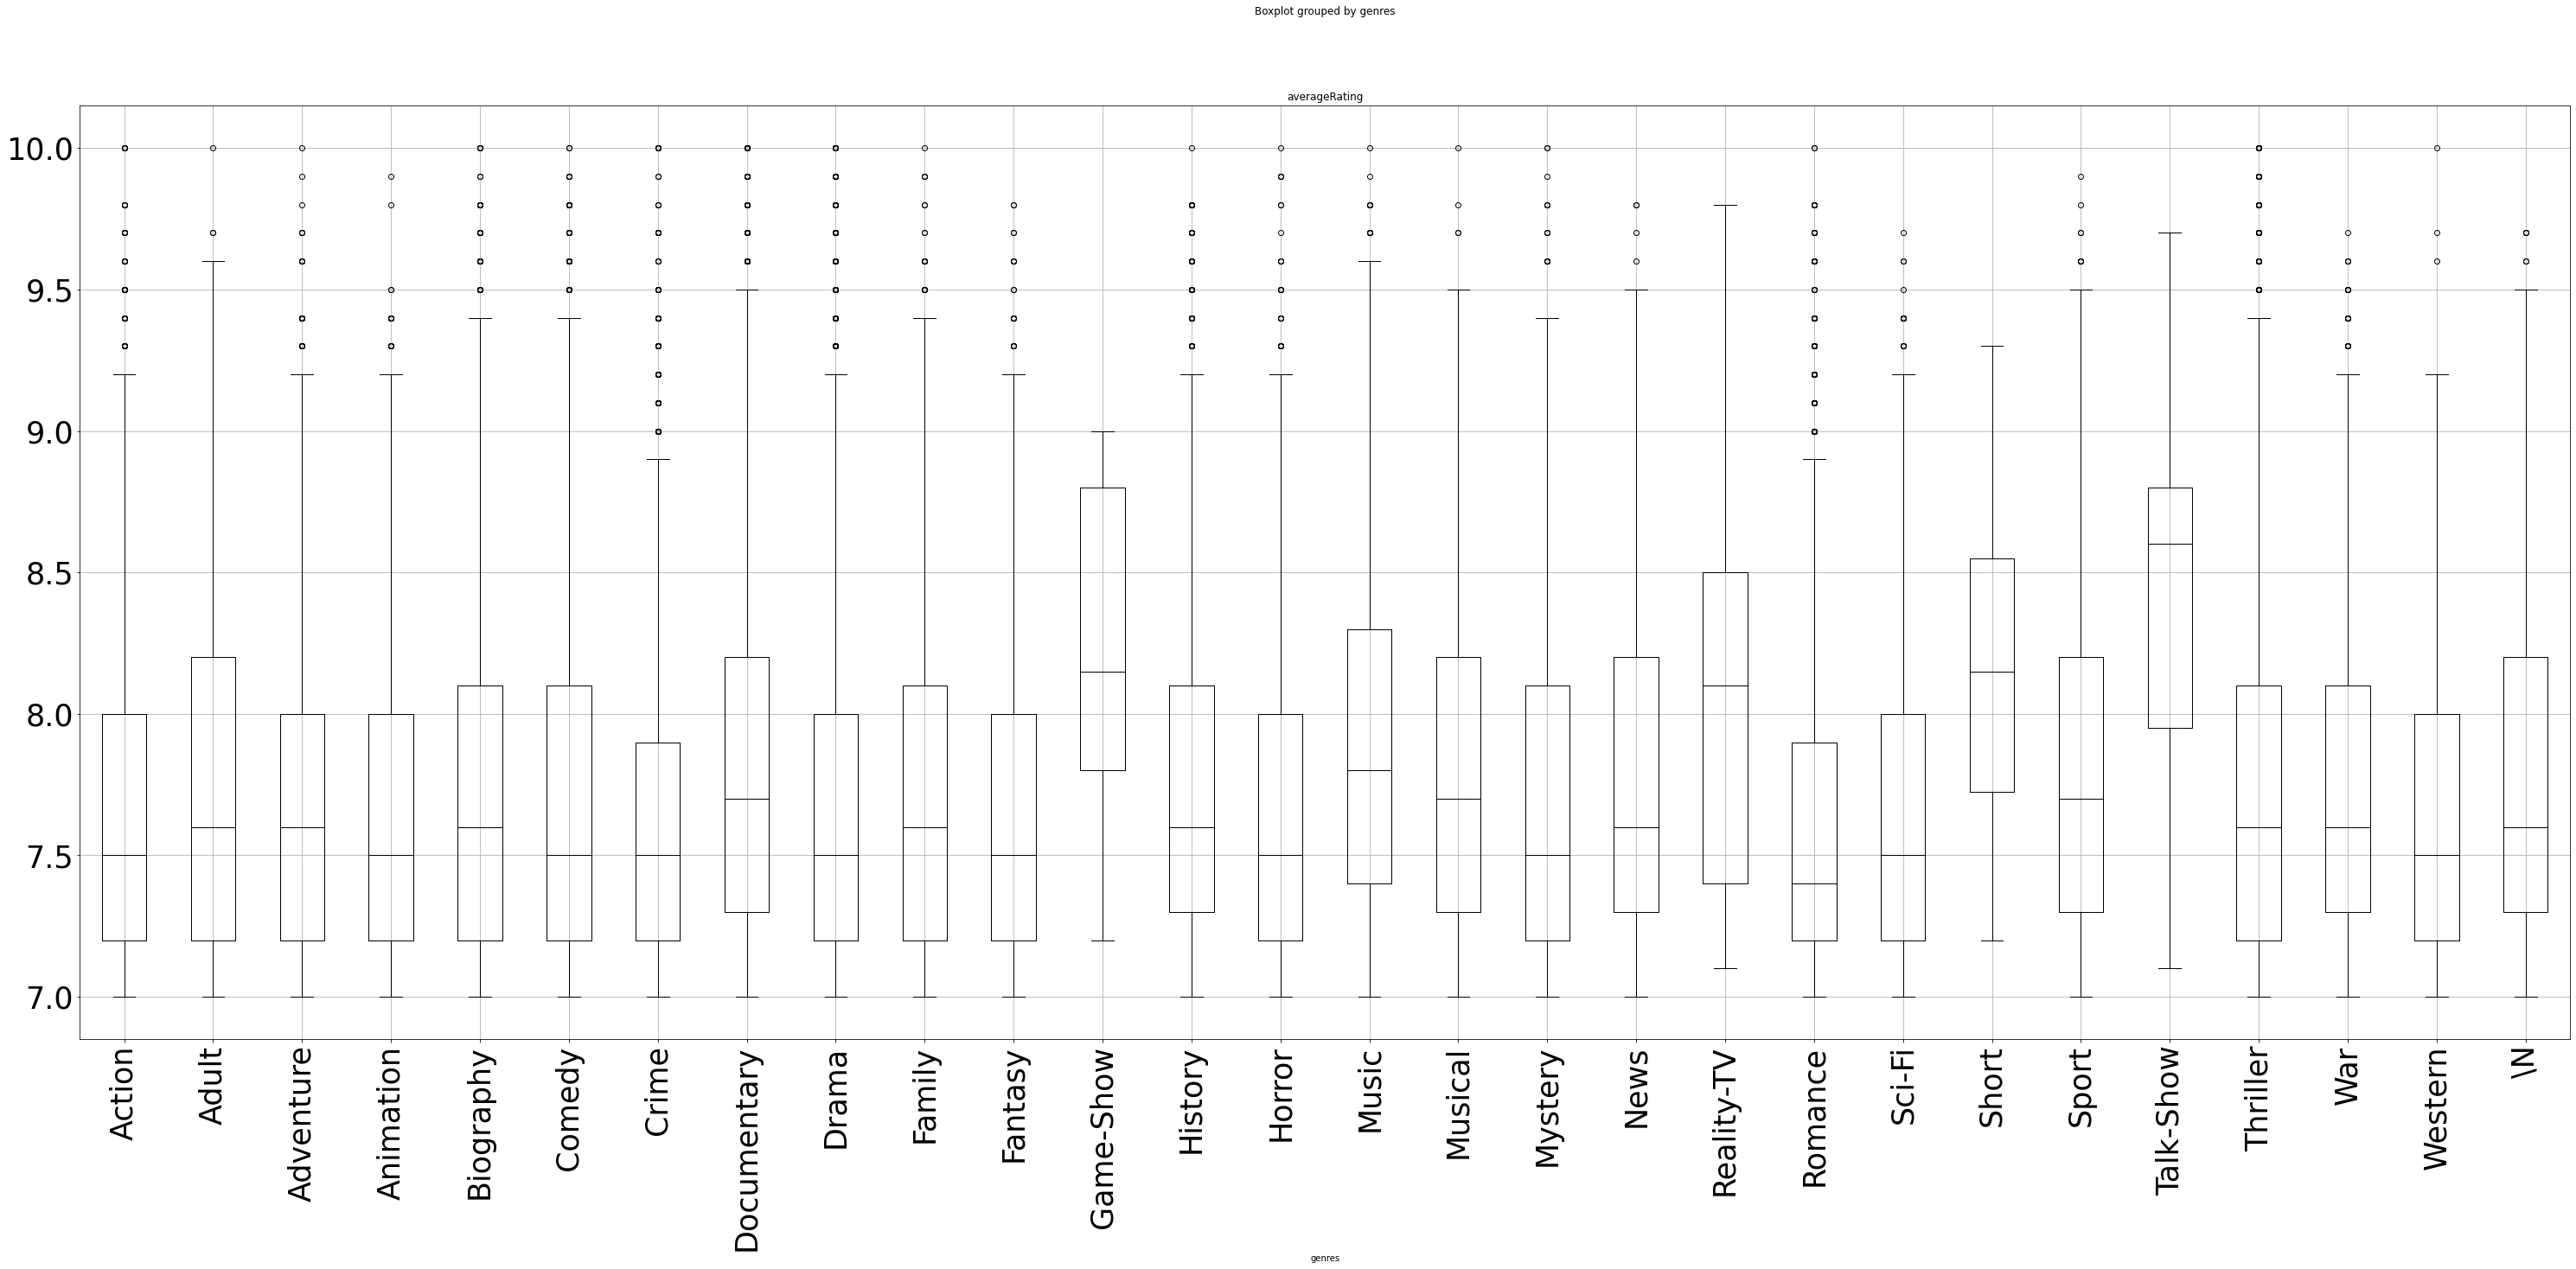

In [24]:
df_genre = df.assign(genres=df['genres'].str.split(',')).explode('genres')

df_genre.boxplot(column='averageRating', by='genres', figsize=(50,20), color='black', fontsize='35', rot='90')

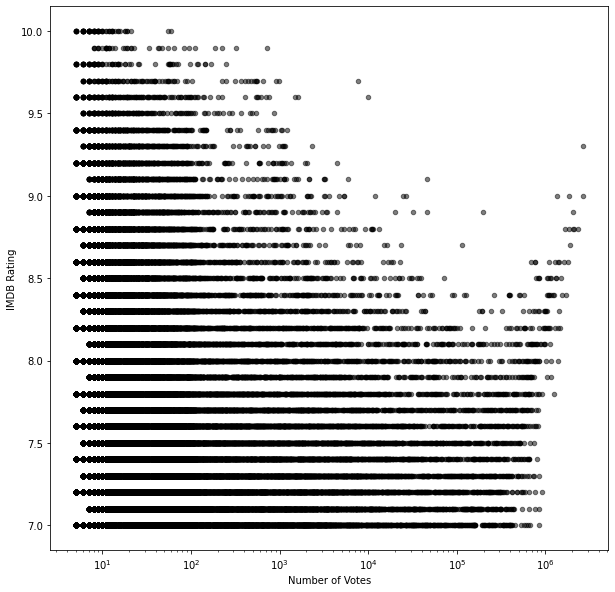

In [25]:

df.plot(kind='scatter', x='numVotes', y='averageRating', logx=True, alpha=0.5, color=['black'], figsize=(10,10))
plt.ylabel('IMDB Rating')
plt.xlabel('Number of Votes')
plt.show()

In [46]:
# create serie to plot
# create serie to plot
df_directors = df.assign(directors=df['directors'].str.split(',')).explode('directors')
import numpy as np
import matplotlib.pyplot as plt

browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=df_directors['directors'].value_counts().values,
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, df_directors['directors'].value_counts().keys(), ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()

IndexError: list index out of range

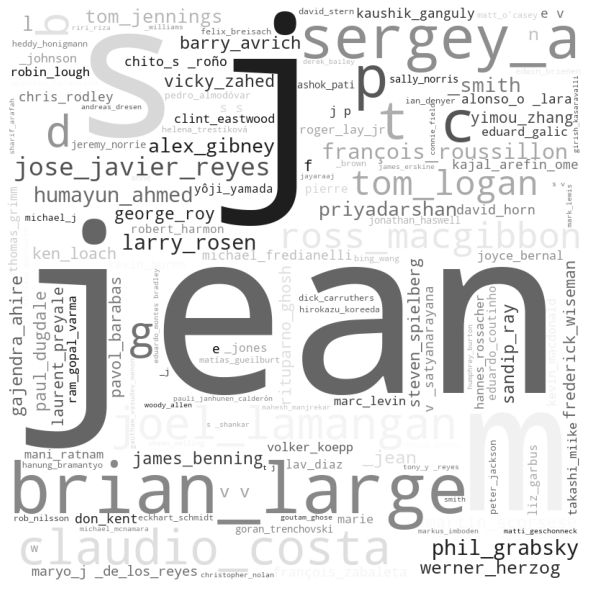

In [34]:
df_directors = df.assign(directors=df['directors'].str.split(',')).explode('directors')

df_directors['directors'] = df_directors['directors'].apply(lambda x: '_'.join(str(x).split(' ')))

df_directors = df_directors[df_directors['directors'] != 'nan']


from wordcloud import WordCloud

comment_words = ''

# iterate through the csv file
for index, row in df_directors.iterrows():
     
    # typecaste each val to string
    val = str(row['directors'])
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', colormap='gray',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()